In [6]:
#Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
              
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) #Adjust config of plots we will create
              
#Read in data
              
df = pd.read_csv(r'C:\Users\Anton\Documents\Data Analysis\movies.csv')    
              
        

In [5]:
#looking at data -- Let's find correlations!
#Our target will be 'revenue'
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [8]:
#Check if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
    #No null values!

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [9]:
#Data types for columns
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [12]:
#Budget & Gross both have trailing decimals - let's change those to integers
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016


In [17]:
#year & released year don't match up - let's make 'yearcorrect' match up with the year released

df['yearcorrect'] = df['released'].astype(str).str[:4]
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [19]:
#Sort by highest gross rev
df.sort_values(by=['gross'], inplace=False, ascending=False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter N�ss,Action,547,Into the White,R,2013,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012,2013
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,2012,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011,2012
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,2014,106,5.7,Jemma Dallender,21070,Neil Elman,2013,2014
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,1997,84,5.7,Will Friedle,5034,Andy Burg,1997,1997


In [21]:
#Drop any duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

5288                        micro_scope
3486                           i5 Films
6084                               erbp
3225                     double A Films
2707        Zucker Brothers Productions
                     ...               
3527                          120 Films
5466              10th Hole Productions
2815                 101st Street Films
3208                 1+2 Seisaku Iinkai
3832    "DIA" Productions GmbH & Co. KG
Name: company, Length: 2179, dtype: object

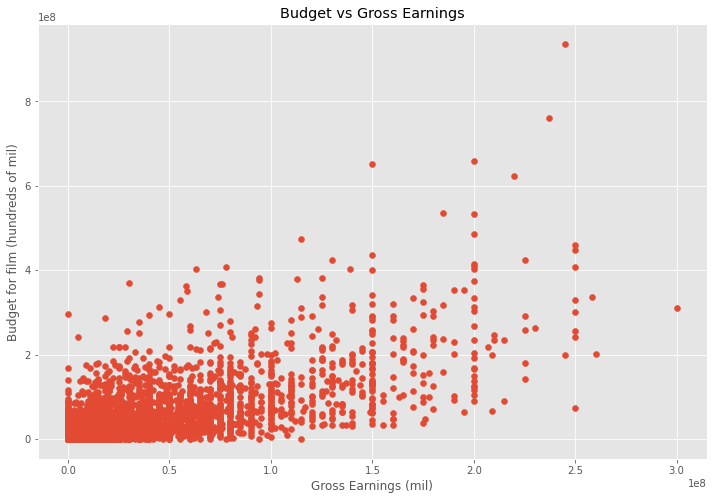

In [24]:
#What columns affect gross revenue the most?
#Hypothesis - budget & company affect gross revenue
#Scatterplot for budget vs gross
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings (mil)')
plt.ylabel('Budget for film (hundreds of mil)')
plt.show()
#There seems to be a general positive correlation - let's check with a regression plot

<AxesSubplot:xlabel='budget', ylabel='gross'>

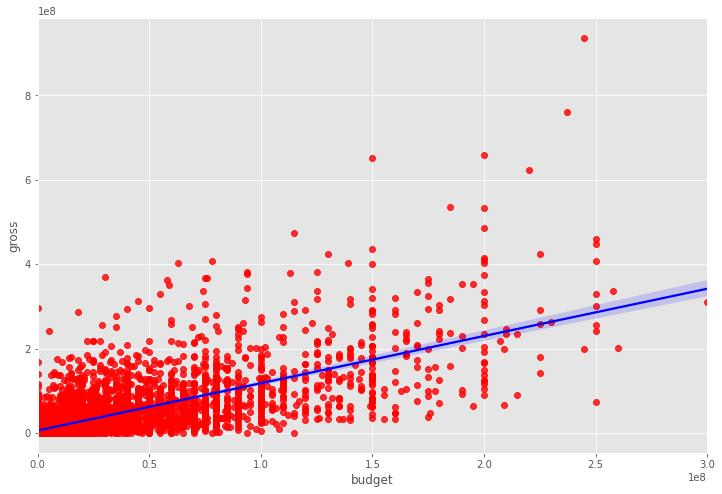

In [28]:
#Seaborn Regression plot - blue trend line to stand out
sns.regplot(x='budget',y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

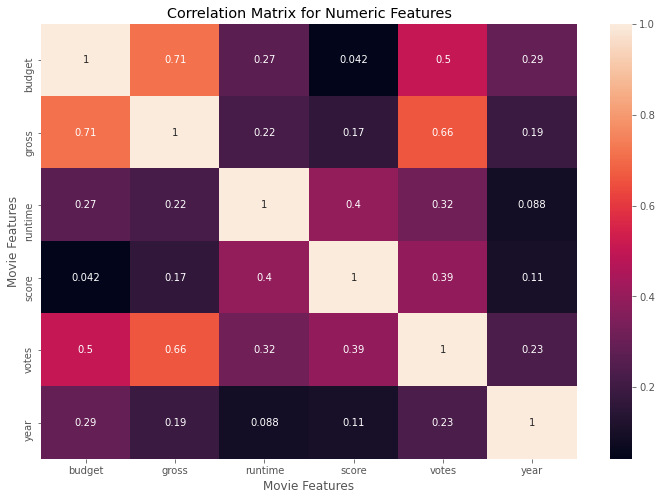

In [36]:
#looking at correlation - numerical fields only
df.corr(method='pearson')

correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()
#.71 correlation b/w budget & gross

In [42]:
#Looking at company - a non-numerical field!

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized
#Now company, country, director, genre (among others) have category codes.
#Does any category code correlate highly with gross revenue?

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,665,54,2192,1,52287414,4661,8,0,89,8.1,2454,299174,3716,1986,0
1,6000000,1680,54,1296,4,70136369,1821,7,0,103,7.8,1605,264740,1970,1986,0
2,15000000,1680,54,2645,0,179800601,6203,6,0,110,6.9,2345,236909,1852,1986,0
3,18500000,2062,54,1066,0,85160248,295,8,0,137,8.4,2192,540152,1629,1986,0
4,9000000,2122,54,2123,1,18564613,1872,6,0,90,6.9,1139,36636,2549,1986,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,1013,53,1623,4,4750497,230,8,30,91,5.4,1066,9161,1800,2016,30
6816,0,1914,54,1989,6,28368,3430,7,30,90,4.9,2146,1959,3008,2016,30
6817,3500000,2124,54,2313,2,3775000,577,8,30,76,6.5,1355,36333,450,2016,30
6818,0,415,54,1914,6,25981,5272,8,30,76,6.2,1370,6947,2946,2016,30


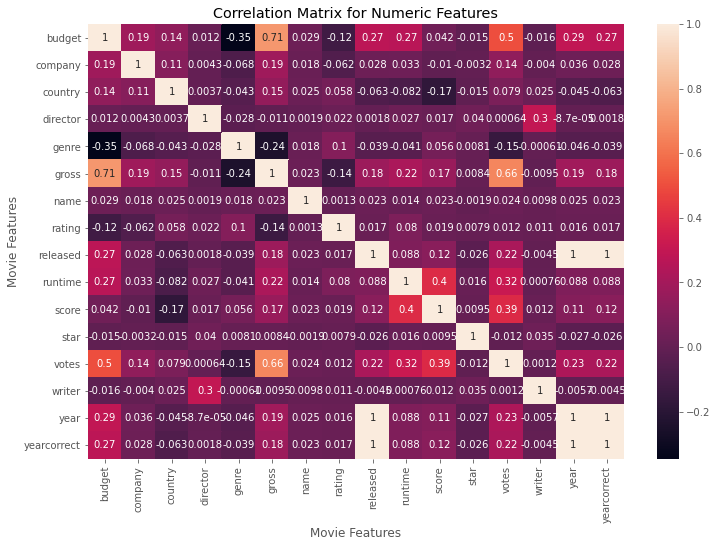

In [43]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()
#company & country are not strongly correlated to gross revenue
#votes and gross revenue seem to be correlated!

In [46]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.346794
budget       genre         -0.346794
gross        genre         -0.242676
genre        gross         -0.242676
score        country       -0.174414
                              ...   
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [48]:
high_corr = sorted_pairs[sorted_pairs > .5]
high_corr
#This table shows votes & budget are correlated, as well as votes vs rev & budget vs rev
#There is no correlation between company and gross rev

votes        budget         0.503924
budget       votes          0.503924
votes        gross          0.662457
gross        votes          0.662457
             budget         0.712196
budget       gross          0.712196
released     year           0.996229
year         released       0.996229
             yearcorrect    0.996229
yearcorrect  year           0.996229
             released       1.000000
budget       budget         1.000000
writer       writer         1.000000
votes        votes          1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     yearcorrect    1.000000
             released       1.000000
rating       rating         1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
y